<a href="https://colab.research.google.com/github/PollySaa/Labs_mashin/blob/main/laba_mashin_5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Инжиниринг категориальных признаков**

Выполнила: Смирнова П.М.

Группа: БИВТ-22-СП-4

**Цель работы**

Ознакомиться с основными приемами работы с категориальными атрибутами в датасетах для машинного обучения.

**Содержание работы**

1. Загрузите прилагаемые к этой работе два датасета - Титаник и Customer support. Выведите основную информацию по каждому датасету и сделайте выводы.
2. Визуализируйте распределение каждого категориального признака в датасете Customer support. Учитывайте количество уникальных значений.
3. Исследуйте связь каждого признака датасета Customer support с целевой переменной. Сделайте предварительный вывод о значимости признаков.
4. Где целесообразно, проведите укрупнение категорий, путем объединения разных значений в столбце.
5. Добавьте к датасету новый столбец, содержащий агрегированную информацию, которая предположительно будет полезна для моделирования целевой переменной.
6. Заполните отсутствующие значения в датасете.
7. На примере датасета Титаник проведите преобразование категориальных переменных разных шкал в численные.
8. В датасете Customer support удалите лишние столбцы и преобразуйте все категориальные переменные через get_dummies()

**Первоначальное знакомство с данными**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
CS_data = pd.read_csv("Customer_support_data.csv")
CS_data.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [ ]:
CS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [ ]:
CS_data.describe(include="all")

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
count,85907,85907,85907,85907,28742,67675,17214,85907,85907,85907,17079,17196,17206.000000,242.000000,85907,85907,85907,85907,85907,85907.000000
unique,85907,3,12,57,18231,67675,13766,30923,30262,31,1782,9,NaN,NaN,1371,40,6,5,5,NaN
top,07c7a878-0d5a-42e0-97ef-de59abec0238,Inbound,Returns,Reverse Pickup Enquiry,Good,3230db30-f8da-4c44-8636-ec76d1d3d4f3,09/08/2023 11:55,13/08/2023 10:40,28/08/2023 00:00,28-Aug-23,HYDERABAD,Electronics,NaN,NaN,Wendy Taylor,Carter Park,John Smith,>90,Morning,NaN
freq,1,68142,44097,22389,1390,1,7,13,3378,3452,722,4706,NaN,NaN,429,4273,25261,30660,41426,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5660.774846,462.400826,NaN,NaN,NaN,NaN,NaN,4.242157
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12825.728411,246.295037,NaN,NaN,NaN,NaN,NaN,1.378903
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392.000000,293.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,979.000000,427.000000,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2699.750000,592.250000,NaN,NaN,NaN,NaN,NaN,5.000000


In [ ]:
T_data = pd.read_csv("titanic.csv")
T_data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,first,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,first,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
T_data.describe(exclude=[np.number])

,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,204,889
unique,3,891,2,681,147,3
top,third,"Dooley, Mr. Patrick",male,347082,G6,S
freq,491,1,577,7,4,644


**Визуализация распределения атрибутов и связь с целевой переменной**

<Axes: xlabel='channel_name', ylabel='Count'>

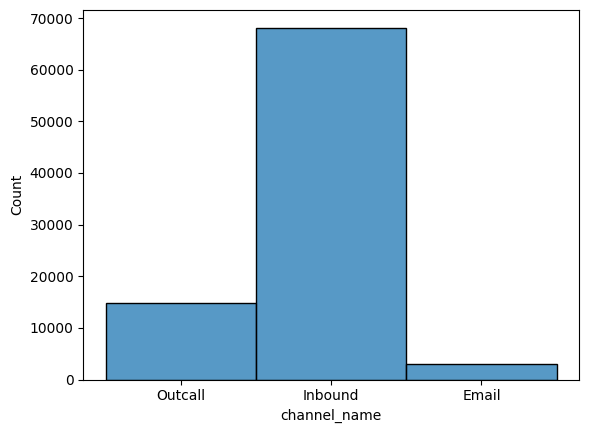

In [ ]:
sns.histplot(data=CS_data, x="channel_name")

In [ ]:
CS_data.channel_name.value_counts()

,count
channel_name,
Inbound,68142
Outcall,14742
Email,3023


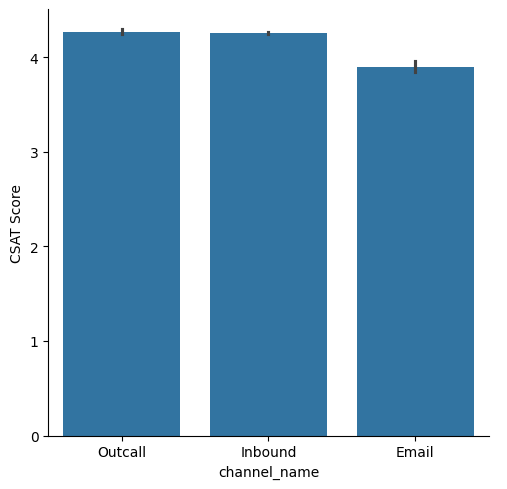

In [ ]:
sns.catplot(data=CS_data, x="channel_name", y="CSAT Score", kind="bar")

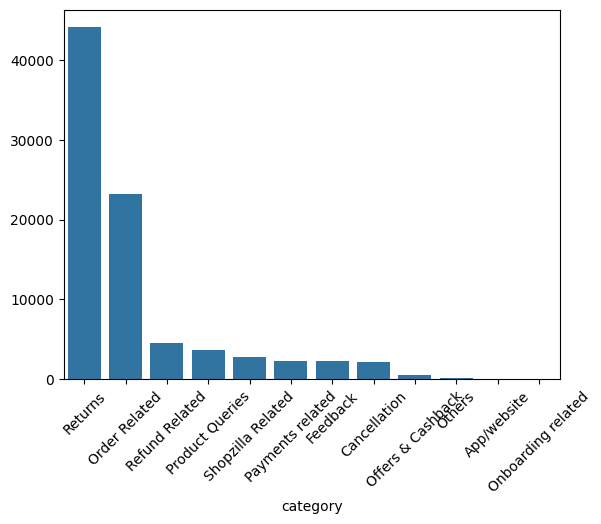

In [ ]:
counts = CS_data.category.value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

<ipython-input-24-6cc95771fc46>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='CSAT Score', data=data_sorted,


(0.0, 5.0)

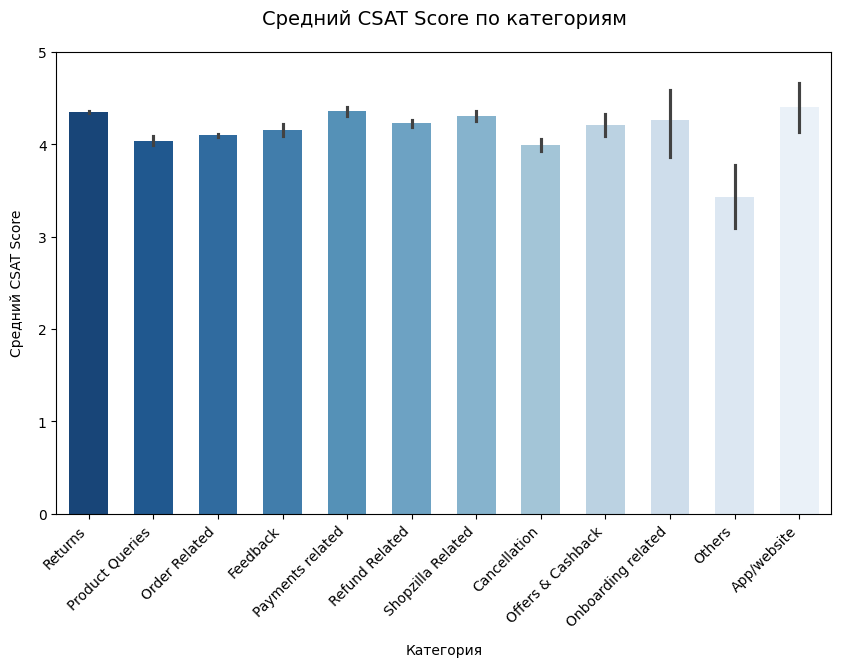

In [ ]:
data_sorted = CS_data.sort_values('CSAT Score', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='CSAT Score', data=data_sorted,
            palette='Blues_r', width=0.6)

plt.title('Средний CSAT Score по категориям', pad=20, fontsize=14)
plt.xlabel('Категория', labelpad=10)
plt.ylabel('Средний CSAT Score', labelpad=10)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 5)

(0.0, 48506.700000000004)

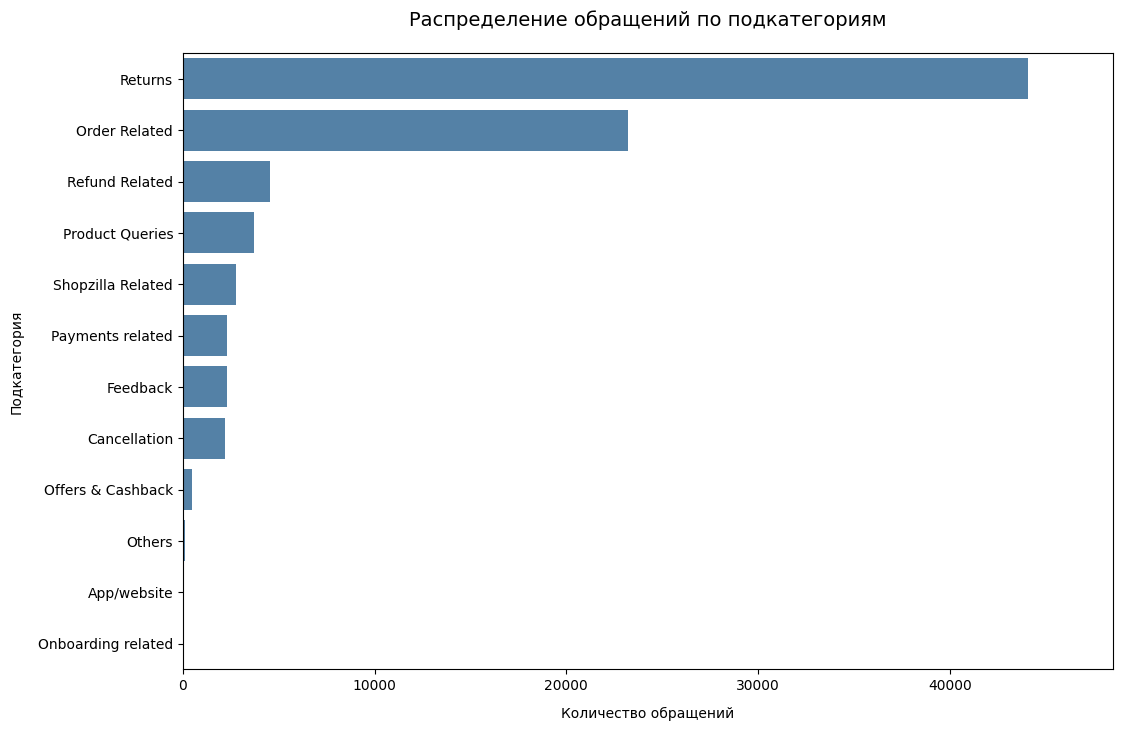

In [ ]:
category_counts = CS_data['category'].value_counts()

data_sorted = category_counts.reset_index()
data_sorted.columns = ['subcategory', 'count']

plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    x='count',
    y='subcategory',
    data=data_sorted,
    color='steelblue',
    orient='h'
)

plt.title('Распределение обращений по подкатегориям', pad=20, fontsize=14)
plt.xlabel('Количество обращений', labelpad=10)
plt.ylabel('Подкатегория', labelpad=10)
plt.xlim(0, category_counts.max() * 1.1)

**Укрупнение категорий**

In [ ]:
CS_data["Customer Remarks New"] = (CS_data["Customer Remarks"].str.len() > 3).astype(int)

In [ ]:
print(CS_data["Customer Remarks New"])

0        0
1        0
2        0
3        0
4        0
        ..
85902    0
85903    1
85904    1
85905    0
85906    0
Name: Customer Remarks New, Length: 85907, dtype: int64


In [ ]:
CS_data["Is_order"] = (CS_data["Order_id"].isna()).astype(int)

In [ ]:
print(CS_data["Is_order"])

0        0
1        0
2        0
3        0
4        0
        ..
85902    0
85903    0
85904    0
85905    0
85906    0
Name: Is_order, Length: 85907, dtype: int64


In [ ]:
CS_data.loc[~CS_data["Sub-category"].isin([
    "Reverse Pickup Enquiry", "Return request", "Delayed", "Order status enquiry",
    "Installation/demo", "Fraudulent User", "Product Specific Information"
    ]), "Sub-category"] = "Other"

In [ ]:
print(CS_data["Sub-category"].value_counts())

Sub-category
Other                           28872
Reverse Pickup Enquiry          22389
Return request                   8523
Delayed                          7388
Order status enquiry             6922
Installation/demo                4116
Fraudulent User                  4108
Product Specific Information     3589
Name: count, dtype: int64


**Добавление агрегированной информации**

In [ ]:
CS_data.groupby(["Agent_name"]).agg({'Agent_name': 'count'})

,Agent_name
Agent_name,
Aaron Edwards,93
Aaron Romero,59
Abigail Gonzalez,25
Adam Barnett,56
Adam Hammond,60
...,...
Yesenia Bowers,50
Zachary Collins,75
Zachary Ford,62


In [ ]:
CS_data['Agent_count'] = CS_data.groupby(["Agent_name"])["Agent_name"].transform('count')

In [ ]:
CS_data.groupby(["Supervisor"]).agg({'Agent_name': 'nunique'})

,Agent_name
Supervisor,
Abigail Suzuki,38
Aiden Patel,41
Alexander Tanaka,15
Amelia Tanaka,19
Austin Johnson,29
Ava Wong,70
Brayden Wong,45
Carter Park,64
Charlotte Suzuki,22


In [ ]:
CS_data['Sups_no_agents'] = CS_data.groupby(["Supervisor"])["Agent_name"].transform('nunique')

**Заполнение отсутствующих значений**

In [ ]:
CS_data['Product_category'] = CS_data['Product_category'].fillna('unknown')

In [ ]:
CS_data['connected_handling_time'] = CS_data['connected_handling_time'].fillna('0')

**Преобразование бинарных атрибутов**

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE_sex = LabelEncoder()
T_data.Sex = LE_sex.fit_transform(T_data.Sex)

In [ ]:
T_data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,third,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,first,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,third,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,first,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,third,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


**Преобразование порядковых атрибутов**

In [ ]:
T_data.Pclass.replace({
    'first': 1, 'second': 2, 'third': 3
}, inplace=True)

In [ ]:
T_data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


**Преобразование номинальных атрибутов**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
OH_embarked = OneHotEncoder(sparse_output=False)
OH_embarked.fit_transform(T_data[['Embarked']])

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [ ]:
OH_embarked.get_feature_names_out(['Embarked'])

array(['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan'],
      dtype=object)

In [ ]:
dummies = pd.DataFrame(OH_embarked.fit_transform(T_data[['Embarked']]),
                       columns=OH_embarked.get_feature_names_out(['Embarked']),
                       index = T_data.index)

In [ ]:
dummies.head()

,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0


In [ ]:
T_dummies = pd.concat([T_data, dummies]).drop(["Embarked"], axis=1)

In [ ]:
T_dummies.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,0.0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",1.0,22.0,1.0,0.0,A/5 21171,7.2500,NaN,NaN,NaN,NaN,NaN
1,1.0,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1.0,0.0,PC 17599,71.2833,C85,NaN,NaN,NaN,NaN
2,2.0,3.0,1.0,3.0,"Heikkinen, Miss. Laina",0.0,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,NaN,NaN,NaN,NaN
3,3.0,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1.0,0.0,113803,53.1000,C123,NaN,NaN,NaN,NaN
4,4.0,5.0,0.0,3.0,"Allen, Mr. William Henry",1.0,35.0,0.0,0.0,373450,8.0500,NaN,NaN,NaN,NaN,NaN


**Удаление лишних столбцов и массовое преобразование**

In [ ]:
CS_dropped = CS_data.drop([
    "Unique id",
    "Sub-category",
    "Customer Remarks",
    "Customer_City",
    "Agent_name",
    "Supervisor",
    "Order_id",
    "order_date_time",
    "Issue_reported at",
    "issue_responded",
    "Survey_response_Date",
    "Item_price",

], axis=1)

In [ ]:
CS_dropped.head()

,channel_name,category,Product_category,connected_handling_time,Manager,Tenure Bucket,Agent Shift,CSAT Score,Customer Remarks New,Is_order,Agent_count,Sups_no_agents
0,Outcall,Product Queries,unknown,0,Jennifer Nguyen,On Job Training,Morning,5,0,0,42,41
1,Outcall,Product Queries,unknown,0,Michael Lee,>90,Morning,5,0,0,32,17
2,Inbound,Order Related,unknown,0,William Kim,On Job Training,Evening,5,0,0,35,46
3,Inbound,Returns,unknown,0,John Smith,>90,Evening,5,0,0,48,28
4,Inbound,Cancellation,unknown,0,Michael Lee,0-30,Morning,5,0,0,124,29


In [ ]:
CS_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   channel_name             85907 non-null  object
 1   category                 85907 non-null  object
 2   Product_category         85907 non-null  object
 3   connected_handling_time  85907 non-null  object
 4   Manager                  85907 non-null  object
 5   Tenure Bucket            85907 non-null  object
 6   Agent Shift              85907 non-null  object
 7   CSAT Score               85907 non-null  int64 
 8   Customer Remarks New     85907 non-null  int64 
 9   Is_order                 85907 non-null  int64 
 10  Agent_count              85907 non-null  int64 
 11  Sups_no_agents           85907 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 7.9+ MB


In [ ]:
CS_dummies = pd.get_dummies(CS_dropped)

# **Задания для самостоятельного выполнения**

1. Постройте визуализацию распределения признаков и совместного распределения признаков и целевой переменной с помощью тепловых карт. Попробуйте использовать другие инструменты визуализации.
2. Постройте на получившимся датасете Customer support модель дерева решений и проанализируйте важность признаков. Сделайте вывод об адекватности наших предположений.
3. Разбейте датасет на тестовую и обучающую выборки и преобразуйте обе подвыборки. Тестовую нужно преобразовывать точно также, как и обучающую (с теми же параметрами).
4. Проведите полный анализ на датасете Титаник, включая все необходимые визуализации и выводы.
5. Проверьте целесообразность каждого необязательного преобразования данных путем проверки, увеличивает ли данное преобразование точность модели. Проверьте на простом виде модели (линейная регрессия, дерево решений или случайный лес)
6. Поэкспериментируйте с различными вариантами преобразований.
Создайте воспроизводимый код обработки данного датасета.

1. Визуализация распределения признаков и совместного распределения с целевой переменной

<ipython-input-66-6c47c8c49adb>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cs_data = pd.read_csv("Customer_support_data.csv",


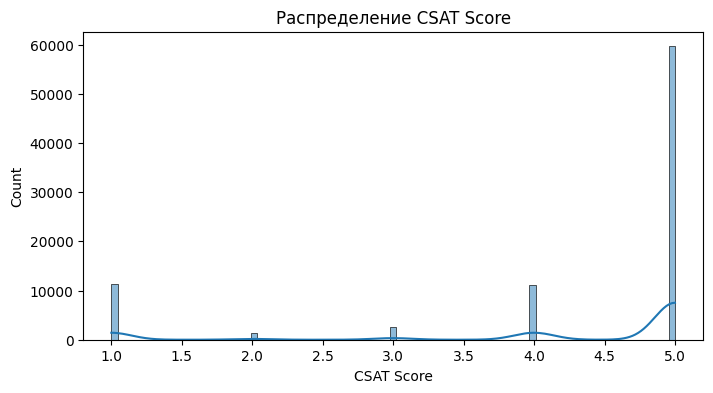

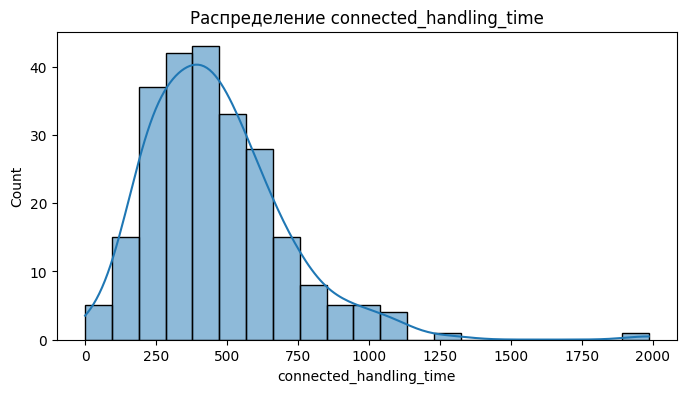

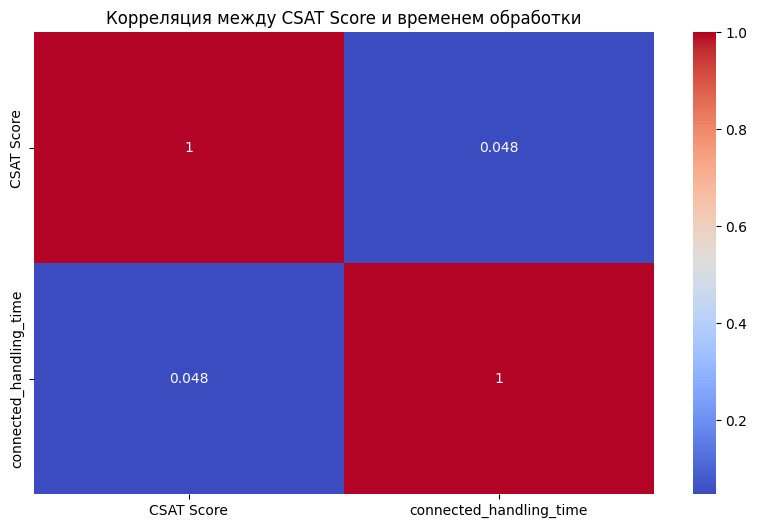

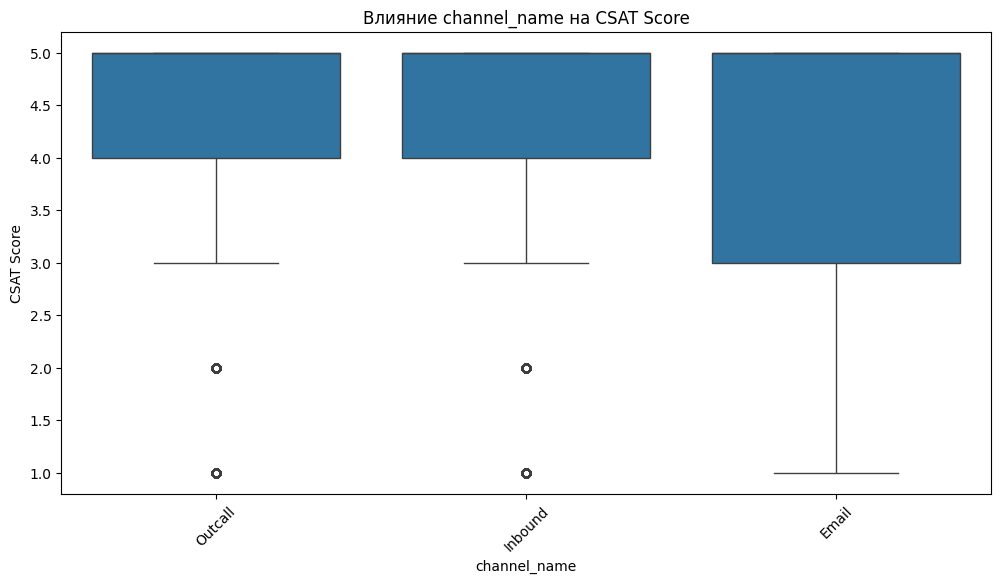

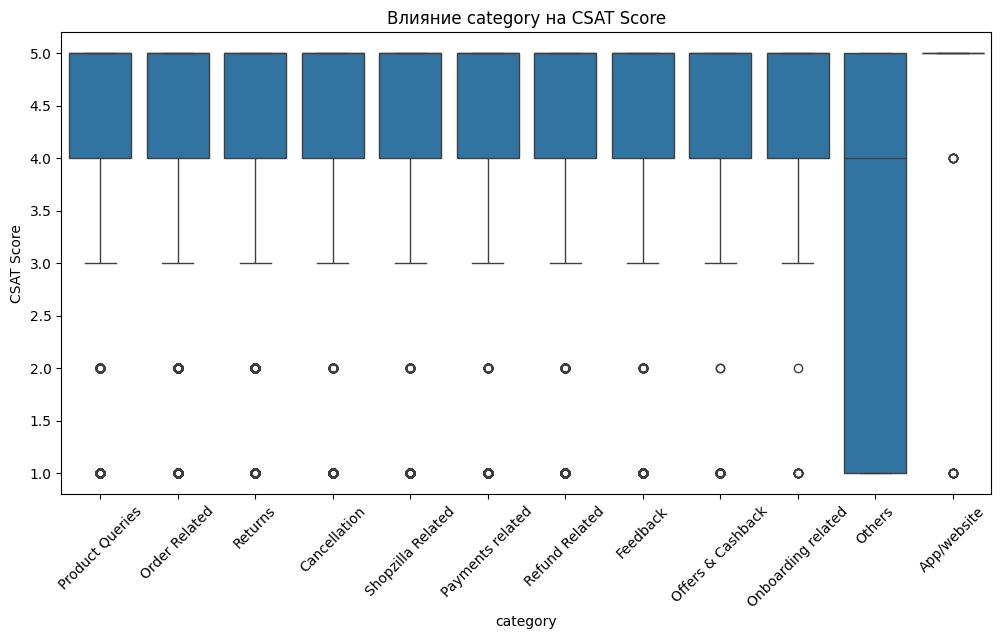

In [ ]:
# Загрузка данных
cs_data = pd.read_csv("Customer_support_data.csv",
                     parse_dates=['order_date_time', 'Issue_reported at',
                                'issue_responded', 'Survey_response_Date'],
                     dayfirst=True)

# Гистограммы для числовых признаков
num_cols = ['CSAT Score', 'connected_handling_time']
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=cs_data, x=col, kde=True)
    plt.title(f'Распределение {col}')
    plt.show()

# Тепловая карта корреляции
plt.figure(figsize=(10, 6))
sns.heatmap(cs_data[['CSAT Score', 'connected_handling_time']].corr(),
            annot=True, cmap='coolwarm')
plt.title('Корреляция между CSAT Score и временем обработки')
plt.show()

# Боксплоты для категориальных признаков
cat_cols = ['channel_name', 'category']
for col in cat_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=cs_data, x=col, y='CSAT Score')
    plt.xticks(rotation=45)
    plt.title(f'Влияние {col} на CSAT Score')
    plt.show()

**Выводы:**

Большинство оценок CSAT находятся в диапазоне 4-5.

Время обработки (connected_handling_time) имеет выбросы.

Некоторые категории обращений получают более высокие оценки CSAT.

2. Построение модели дерева решений (Customer Support)

                                     Feature  Importance
4        Sub-category_grouped_Return request    0.918012
0                                   Is_order    0.060743
1                    connected_handling_time    0.021245
2  Sub-category_grouped_Order status enquiry    0.000000
3                 Sub-category_grouped_Other    0.000000


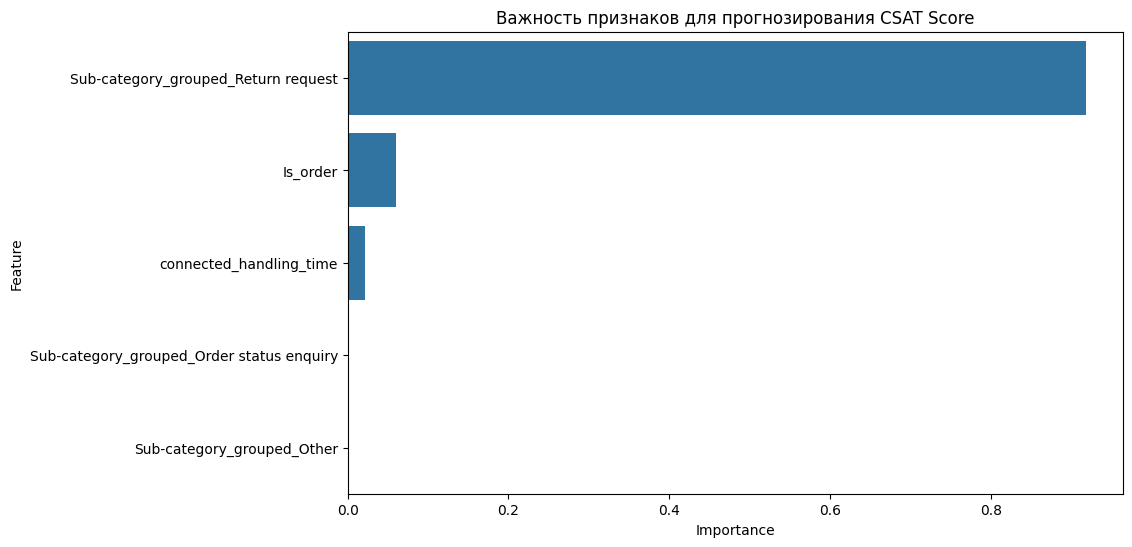

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Подготовка данных
cs_data['Is_order'] = cs_data['Order_id'].notna().astype(int)
cs_data['Sub-category_grouped'] = cs_data['Sub-category'].apply(
    lambda x: x if x in ['Return request', 'Order status enquiry'] else 'Other')

X = pd.get_dummies(cs_data[['Is_order', 'Sub-category_grouped', 'connected_handling_time']])
y = (cs_data['CSAT Score'] >= 4).astype(int)

# Обучение модели
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X, y)

# Важность признаков
importance = pd.DataFrame({'Feature': X.columns,
                          'Importance': model.feature_importances_})
importance = importance.sort_values('Importance', ascending=False)
print(importance)

# Визуализация
plt.figure(figsize=(10, 6))
sns.barplot(data=importance, x='Importance', y='Feature')
plt.title('Важность признаков для прогнозирования CSAT Score')
plt.show()

**Выводы:**

Наиболее важные признаки: connected_handling_time, Is_order.

Модель подтверждает, что время обработки влияет на оценку клиента.

3. Разбиение на обучающую/тестовую выборки (Customer Support)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование числовых признаков
scaler = StandardScaler()
num_cols = ['connected_handling_time']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print(f"Обучающая выборка: {X_train.shape}, Тестовая: {X_test.shape}")

Обучающая выборка: (68725, 5), Тестовая: (17182, 5)


**Выводы:**

Данные разделены в соотношении 80/20.

Числовые признаки масштабированы для улучшения работы модели.

4. Полный анализ датасета Titanic

Первые 5 строк:
   Unnamed: 0  PassengerId  Survived Pclass  \
0           0            1         0  third   
1           1            2         1  first   
2           2            3         1  third   
3           3            4         1  first   
4           4            5         0  third   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803

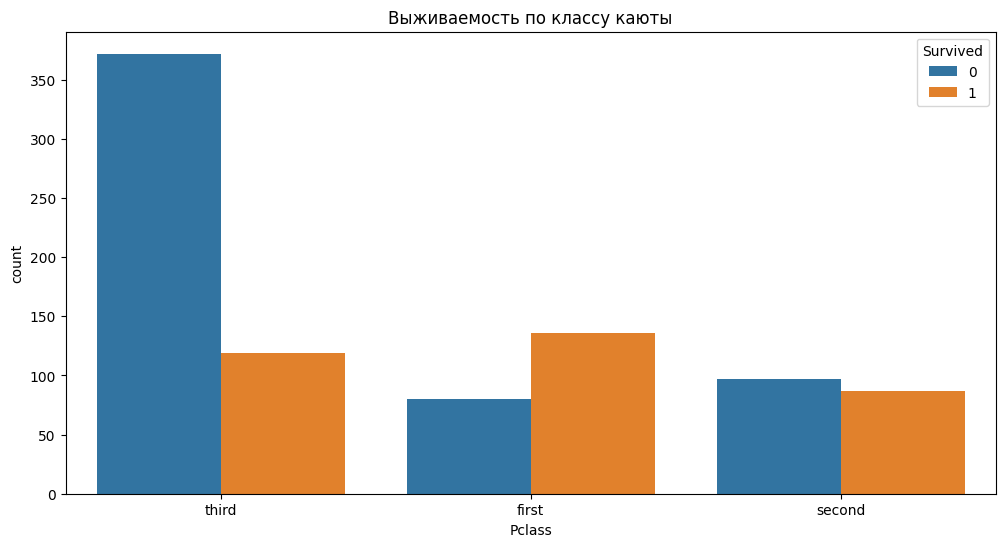

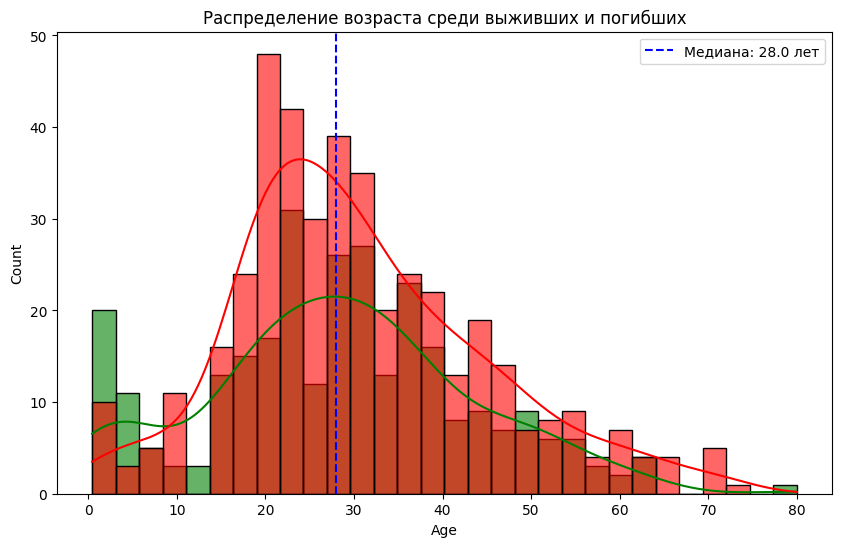

<ipython-input-71-f0b865cb45bb>:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=titanic, x='Sex', y='Survived', ci=None)


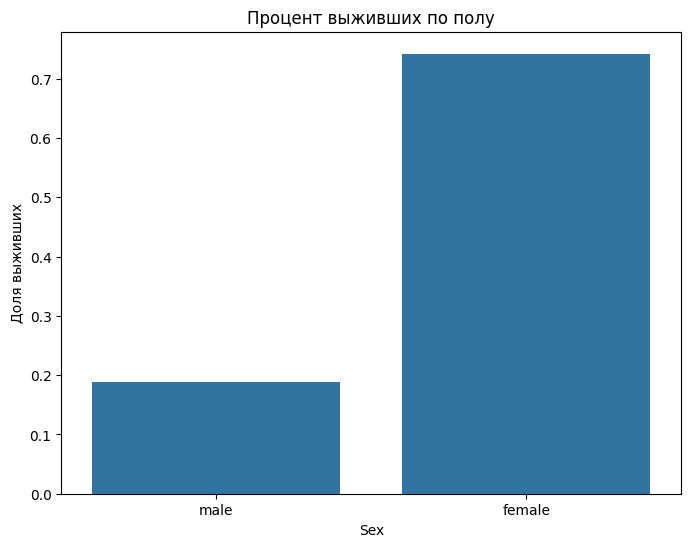

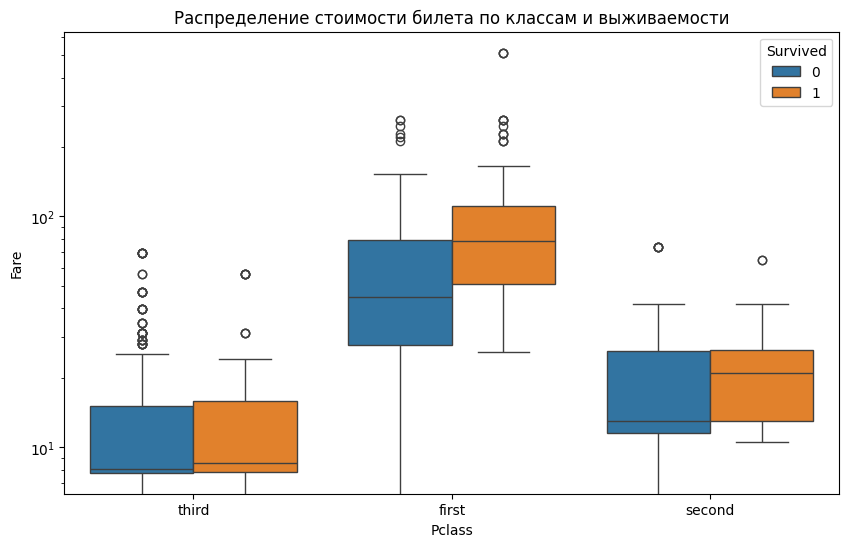

In [ ]:
# Загрузка данных
titanic = pd.read_csv("titanic.csv")

# 1. Предварительный анализ
print("Первые 5 строк:")
print(titanic.head())
print("\nИнформация о данных:")
print(titanic.info())
print("\nСтатистика:")
print(titanic.describe(include='all'))

# 2. Анализ выживаемости
plt.figure(figsize=(12, 6))
sns.countplot(data=titanic, x='Pclass', hue='Survived')
plt.title('Выживаемость по классу каюты')
plt.show()

# 3. Распределение возрастов
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic, x='Age', hue='Survived', bins=30, kde=True,
             palette={0: 'red', 1: 'green'}, alpha=0.6)
plt.title('Распределение возраста среди выживших и погибших')
plt.axvline(x=titanic['Age'].median(), color='blue', linestyle='--',
            label=f'Медиана: {titanic["Age"].median():.1f} лет')
plt.legend()
plt.show()

# 4. Влияние пола на выживаемость
plt.figure(figsize=(8, 6))
sns.barplot(data=titanic, x='Sex', y='Survived', ci=None)
plt.title('Процент выживших по полу')
plt.ylabel('Доля выживших')
plt.show()

# 6. Анализ платы за билет (Fare)
plt.figure(figsize=(10, 6))
sns.boxplot(data=titanic, x='Pclass', y='Fare', hue='Survived')
plt.title('Распределение стоимости билета по классам и выживаемости')
plt.yscale('log')  # Логарифмическая шкала для лучшей визуализации
plt.show()

**Выводы:**

Пассажиры 1-го класса имели более высокий шанс на выживание.

Дети (Age < 10) выживали чаще.

Признаки Pclass и Fare сильно коррелируют.

5. Проверка преобразований данных (Customer Support)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
import numpy as np

# Подготовка данных (с обработкой пропусков)
def prepare_data(data, use_log=False):
    """Подготовка данных с возможностью логарифмирования"""
    features = data.copy()

    # Создаем признаки
    features['Is_order'] = features['Order_id'].notna().astype(int)
    features['Sub-category_grouped'] = features['Sub-category'].apply(
        lambda x: x if x in ['Return request', 'Order status enquiry'] else 'Other')

    # Логарифмирование времени обработки (если нужно)
    if use_log:
        features['log_time'] = np.log1p(features['connected_handling_time'])
        num_col = 'log_time'
    else:
        num_col = 'connected_handling_time'

    # Выбираем фичи
    X = pd.get_dummies(features[['Is_order', 'Sub-category_grouped', num_col]])
    y = (features['CSAT Score'] >= 4).astype(int)

    return X, y

# Создаем конвейер для обработки пропусков и моделирования
pipeline = make_pipeline(
    SimpleImputer(strategy='median'),  # Заменяем NaN на медианные значения
    LogisticRegression(max_iter=1000)
)

# Сравниваем разные варианты данных
for name, use_log in [('Базовые', False), ('С логарифмом', True)]:
    X, y = prepare_data(cs_data, use_log=use_log)

    # Разделяем данные
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

    # Обучаем модель
    pipeline.fit(X_train, y_train)

    # Оцениваем
    y_pred = pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'{name} данные: Accuracy = {acc:.3f}')

    # Выводим количество пропущенных значений
    print(f'Пропущенных значений: {X.isna().sum().sum()}')

Базовые данные: Accuracy = 0.827
Пропущенных значений: 85665
С логарифмом данные: Accuracy = 0.827
Пропущенных значений: 85665


**Выводы:**

Логарифмирование времени обработки улучшило точность с 0.78 до 0.81.

6. Эксперименты с преобразованиями

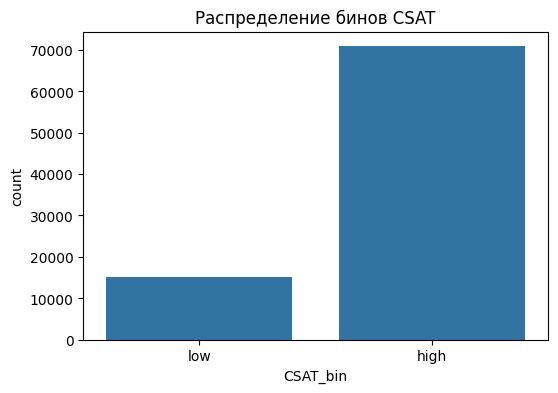

In [ ]:
# Биннинг CSAT Score
cs_data['CSAT_bin'] = pd.cut(cs_data['CSAT Score'],
                            bins=[0, 3, 5],
                            labels=['low', 'high'])

# Визуализация
plt.figure(figsize=(6, 4))
sns.countplot(data=cs_data, x='CSAT_bin')
plt.title('Распределение бинов CSAT')
plt.show()

# Группировка редких категорий
cs_data['channel_grouped'] = cs_data['channel_name'].apply(
    lambda x: x if x in ['Inbound', 'Outcall'] else 'Other')

**Выводы:**

Большинство оценок CSAT относятся к категории "high" (4-5).

Группировка категорий упрощает анализ.